In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
from datetime import timedelta, datetime
import scipy as sp
import scipy.interpolate
import seaborn as sns
from scipy.stats import moment


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
offset = timedelta(minutes=60)

In [ ]:
address_txns = pd.read_csv("/content/drive/MyDrive/Pool Tx Data/Antpool/hop 3/v2/bc1qdtj4quduwq5zr4zvdamq8y92xfl5claqx29n0w/3DpHWB33AYnBaeWCD8XGwrhYhM8tMngBqv.csv")
address_txns["timestamp"] = pd.to_datetime(address_txns.timestamp).apply(lambda x: x.tz_localize(None)) #make the timestamps pandas and UTC
# address_txns = address_txns.loc[(address_txns["timestamp"] >=  pd.Timestamp("2021-02-08")) & (address_txns["timestamp"] <=  pd.Timestamp("2021-02-22"))] #filter the address's transactions by a date range

price_data = pd.read_csv("/content/drive/MyDrive/Price Data/FTX_BTCUSD_minute_with_returns.csv")
price_data["timestamp"] = pd.to_datetime(price_data.timestamp).apply(lambda x: x.tz_localize(None)) #make the timestamps pandas and UTC

In [ ]:
address_txns

In [ ]:
price_data_containing_txns = pd.DataFrame(columns=["timestamp","delta t+5"])
for timestamp in address_txns.groupby("timestamp").sum().index:
  price_data_containing_txns = price_data_containing_txns.append(price_data.loc[(price_data["timestamp"] >= timestamp) & (price_data["timestamp"] <= timestamp+offset),["timestamp","delta t+5"]], ignore_index=True)
price_data_containing_txns.sort_values("timestamp",inplace=True)
price_data_containing_txns.drop_duplicates(subset=["timestamp"], inplace=True)

In [ ]:
price_data_containing_txns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


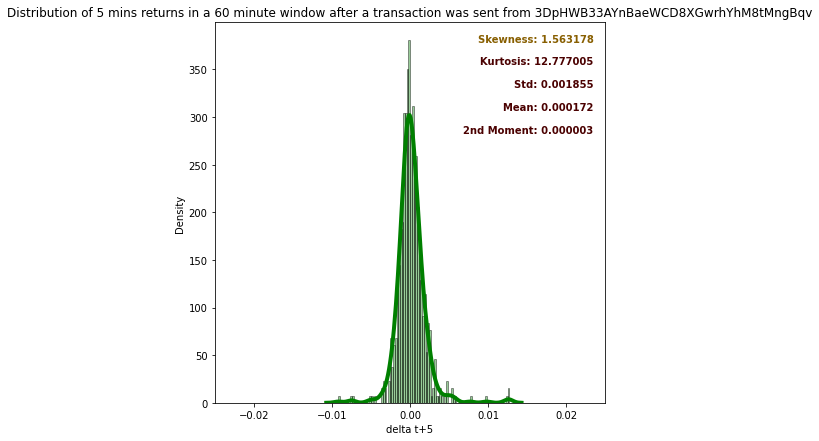

In [ ]:
f, ax = plt.subplots(figsize=(7, 7))
sns.distplot(price_data_containing_txns["delta t+5"], hist=True,norm_hist=True, kde=True, bins=int(100), color = 'green', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4}, ax=ax)

ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % price_data_containing_txns["delta t+5"].skew(), fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:poo brown')

ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % price_data_containing_txns["delta t+5"].kurt(), fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:dried blood')
ax.text(x=0.97, y=0.85, transform=ax.transAxes, s="Std: %f" % price_data_containing_txns["delta t+5"].std(), fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:dried blood')
ax.text(x=0.97, y=0.79, transform=ax.transAxes, s="Mean: %f" % price_data_containing_txns["delta t+5"].mean(), fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:dried blood')
ax.text(x=0.97, y=0.73, transform=ax.transAxes, s="2nd Moment: %f" % moment(price_data_containing_txns["delta t+5"],moment = 2), fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:dried blood')
# ax.text(x=0.97, y=0.73, transform=ax.transAxes, s="3rd Moment: %f" % moment(price_data_containing_txns["delta t+5"],moment = 3), fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:dried blood')
plt.title("Distribution of 5 mins returns in a 60 minute window after a transaction was sent from 3DpHWB33AYnBaeWCD8XGwrhYhM8tMngBqv")
plt.xlim(-.025, .025)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


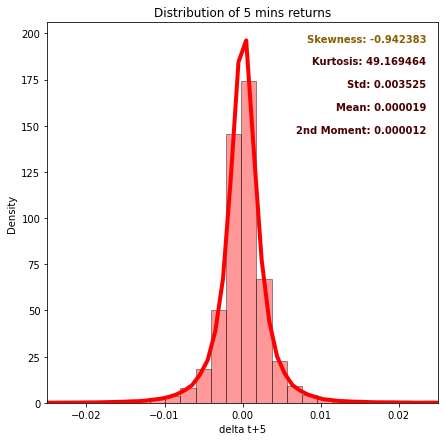

In [ ]:
f, ax = plt.subplots(figsize=(7, 7))
sns.distplot(price_data["delta t+5"], hist=True, kde=True, bins=int(100), norm_hist=True,color = 'red', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4}, ax=ax)

ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % price_data["delta t+5"].skew(), fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:poo brown')

ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % price_data["delta t+5"].kurt(), fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:dried blood')
ax.text(x=0.97, y=0.85, transform=ax.transAxes, s="Std: %f" % price_data["delta t+5"].std(), fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:dried blood')
ax.text(x=0.97, y=0.79, transform=ax.transAxes, s="Mean: %f" % price_data["delta t+5"].mean(), fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:dried blood')
ax.text(x=0.97, y=0.73, transform=ax.transAxes, s="2nd Moment: %f" % moment(price_data["delta t+5"],moment = 2), fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:dried blood')
# ax.text(x=0.97, y=0.73, transform=ax.transAxes, s="3rd Moment: %f" % moment(price_data["delta t+5"],moment = 3), fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:dried blood')
plt.title("Distribution of 5 mins returns")
plt.xlim(-.025, .025)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


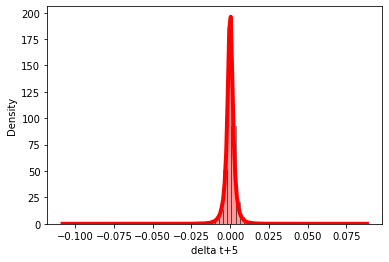

In [ ]:
sns.distplot(price_data["delta t+5"], hist=True, kde=True, 
             bins=int(360/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})



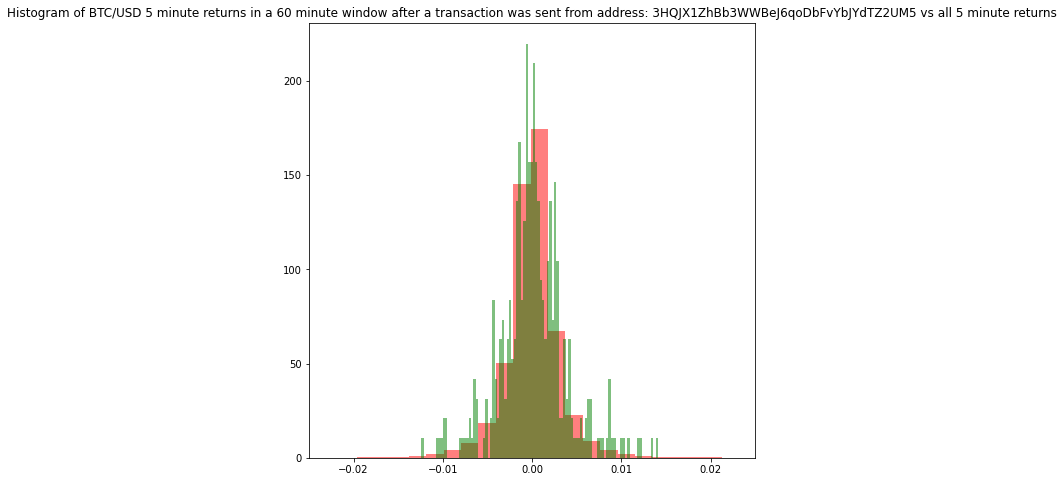

In [ ]:
kwargs = dict(alpha=0.5, bins=100, density=True, stacked=True)
plt.figure(figsize=(8,8))
plt.hist(price_data["delta t+5"],**kwargs,color='r',)
plt.hist(price_data_containing_txns["delta t+5"],**kwargs,color='g',)
plt.xlim(-.025, .025)
plt.title("Histogram of BTC/USD 5 minute returns in a 60 minute window after a transaction was sent from address: 3HQJX1ZhBb3WWBeJ6qoDbFvYbJYdTZ2UM5 vs all 5 minute returns")
plt.show()

In [ ]:
price_data = price_data.loc[(price_data["timestamp"] >= address_txns['timestamp'].min()-offset) & (price_data["timestamp"] <= address_txns['timestamp'].max()+offset)] # get the prices a bit before and after the address's first and last transactions
#upsampling and interpolating
interpolated_price_data = price_data.set_index("timestamp")["delta t+5"].resample("1S").interpolate(method="linear").reset_index()

address_txns_amounts = address_txns.groupby("timestamp").sum()["amount"].reset_index() #sum together transactions made in the same timestamp
address_txns_amounts["timestamp"] = address_txns_amounts["timestamp"].apply(lambda x: x.ceil('1S')) #round the transactions made by the address up to the nearest second

#here we are attempting to create a dataframe the same shape as the price data for the selected range.
address_txns_amounts_copy = pd.DataFrame(interpolated_price_data.timestamp)
address_txns_amounts_copy["amount"] = 0 # fill the dataframe with zeroes
for timestamp in address_txns_amounts["timestamp"]: #for each summed transaction volume, insert it into the correct spot into the dataframe with the same timestamps as the price data
  address_txns_amounts_copy.loc[address_txns_amounts_copy["timestamp"] == timestamp, "amount"] = address_txns_amounts.loc[address_txns_amounts["timestamp"] == timestamp, "amount"].values[0]
address_txns_amounts = address_txns_amounts_copy 

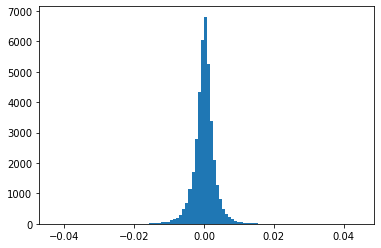

In [ ]:
kwargs = dict(bins=100)
plt.hist(price_data["delta t+5"],**kwargs)
plt.show()

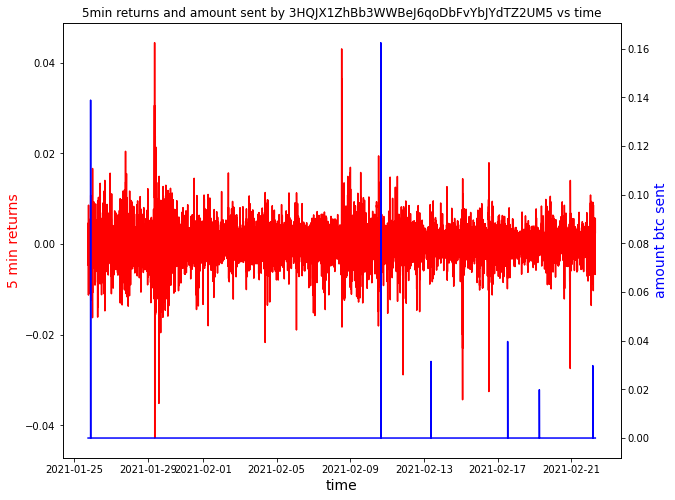

In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(10,8))
# make a plot
ax.plot(interpolated_price_data.timestamp, interpolated_price_data["delta t+5"], color="red")
# set x-axis label
ax.set_xlabel("time",fontsize=14)
# set y-axis label
ax.set_ylabel("5 min returns",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(address_txns_amounts.timestamp,address_txns_amounts.amount ,color="blue")
ax2.set_ylabel("amount btc sent",color="blue",fontsize=14)
plt.title("5min returns and amount sent by 3HQJX1ZhBb3WWBeJ6qoDbFvYbJYdTZ2UM5 vs time")
plt.show()
# save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')